#  Thermal Conduction (in 2 dimensions)

In this project we will implement a simulation (re-evaluation of the values at different time steps) of a metal plate using a 2D *numpy* array with $N\times N$ with $N=32$ elements. We will setup the given initial conditions *i.e.* the temperature should be constant and equal to 0 at all times. <br>
Writing again the function *update_time* that takes a 2-D numpy array, $\kappa$ and $\Delta t$ values as inputs and computes the heat equation at $t+\Delta t$. The function again don't need a return value since you can modify the numpy array in place.


In 1 dimensional thermal conduction we discretize 1 dimensional length *x* by introducing a vector and computed the second spatial derivative using this vector *i.e.* ( $u'' = \partial^2 u/\partial x^2$) by:

$${u'}_{i+1/2} \approx \frac{u_{i+1}-u_{i}}{h} \qquad {u'}_{i-1/2} \approx \frac{u_{i}-u_{i-1}}{h}$$
and obtain#
$${u''}_{i} \approx \frac{u_{i-1}-2 u_i + u_{i+1}}{h^2}. $$
Similarly for the time discretization we introduced $ u_{t+\Delta t} = u_{t} + \Delta t \cdot \kappa^2 {u''_i}. $

For the 2-dimensional thermal conduction problem we can assume a plate which has a unit length of 1 in both $x$ and $y$ directions and constant zero temperature is applied from the all 4 sides. Then we follow the same discretization logic. The thermal distribution in this case can be written as:

$$\frac{\partial u }{\partial t} = \kappa^2 \Delta u $$

with:

$$\Delta u = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} $$

If we are doing the same discretization with $N$ parts in $x$ and $y$ we can write our simulation equation now for any part with the indicess $i$ and $j$:

$$ u_{t+\Delta t,i,j} = u_{t,i,j} + \Delta t \cdot \kappa^2 \frac{u_{t,i-1,j} + u_{t,i+1,j} -4 u_{t,i,j}  + u_{t,i,j-1} + u_{t,i,j+1}}{h^2} $$

The boundary conditions are now $u_{t,0,j} = u_{t,N-1,j} = u_{t,i,0} = u_{t,i,N-1} = 0$.


The limits of the simulation can be given for a proper $\Delta t < \frac{h^2}{2\kappa^2}$.

Similar to the 1d thermal conduction we can define one initial condition:

$$u(x,y,0) = \sin(\pi x) \sin(\pi y) $$ for which we know the exact solution:

$$u(x,y, t) = \sin(\pi x)\sin(\pi y) \textrm{e}^{-\kappa^2 \pi^2 t}$$



For the task we need to iniate a grid with the given 2-D function. Numpy offers a function *meshgrid* that allows creating such grids. Using *meshgrid* one can first generate two seperate grids $xx$ and $yy$ which are the 2-D extensions of the 1-D vectors $x$ and $y$ and obtain the desired grid values by multiplying those matricies. The following code explains the usage of *meshgrid* by creating a multiplication table for values from 1 to 10:

In [1]:
import numpy as np

vector = np.arange(1,11)                           # create a 1d vector with the numbers from 1 to 10

# extend the vectors to a meshgrid
xx, yy = np.meshgrid(vector, vector)

print(xx)                                          # 10 x 10 version of x vector
print(yy)                                          # Notice for yy it is the transpose of these values

# multiply both vectors
matrix = xx * yy
print(matrix)

[[ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]]
[[ 1  1  1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3  3  3]
 [ 4  4  4  4  4  4  4  4  4  4]
 [ 5  5  5  5  5  5  5  5  5  5]
 [ 6  6  6  6  6  6  6  6  6  6]
 [ 7  7  7  7  7  7  7  7  7  7]
 [ 8  8  8  8  8  8  8  8  8  8]
 [ 9  9  9  9  9  9  9  9  9  9]
 [10 10 10 10 10 10 10 10 10 10]]
[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72

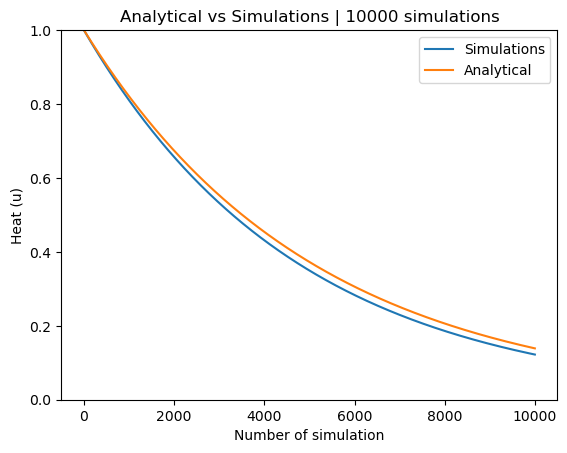

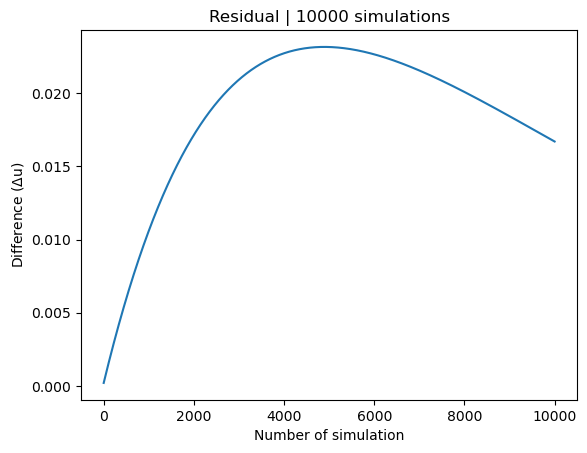

In [2]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

%matplotlib inline

def update_time(heat_grid, k, dt):
    # YOUR CODE HERE
    
    """
    Calculates the heat on the grid for each time-step.
    Input:
    - heat_grid: heat on the grid before the time-step
    - k: thermal conduction co-efficient
    - dt: time-step
    Return:
    - None
    """
    
    #Updating the heat values for current simulation
    heat_grid[1:-1, 1:-1] = heat_grid[1:-1, 1:-1] + \
    (dt * k**2 * (heat_grid[:-2,1:-1] + heat_grid[2:,1:-1] - 4*heat_grid[1:-1, 1:-1] + \
                  heat_grid[1:-1,:-2] + heat_grid[1:-1,2:]) / h**2)
    



        
# main program
# YOUR CODE HERE

#Defining the simulation parameters
N = 32
h = 1/N
k = 1
dt = 0.00001

#Generating the heat grid and initial conditions
rod = np.linspace(0, 1, N)
x_grid, y_grid = np.meshgrid(rod, rod)
heat_grid_ini = np.sin(np.pi * x_grid) * np.sin(np.pi * y_grid)


#Setting the boudary conditions
heat_grid_ini[0, :] = heat_grid_ini[N-1, :] = 0
heat_grid_ini[:, 0] = heat_grid_ini[:, N-1] = 0

#Setting inital grid as the first grid for the simulations
heat_grid = heat_grid_ini.copy()

#Generating the simulations number space
num_of_simul = 10000
simulations = np.arange(0, num_of_simul)

#Generating empty array for storing mean values coming from simulations
heat_grid_mean = np.empty(len(simulations))

#Carrying out the simulations 
for i in simulations:
    update_time(heat_grid, k, dt)
    heat_grid_mean[i] = np.mean(heat_grid[1:-1, 1:-1] / heat_grid_ini[1:-1, 1:-1]) 

#Plotting results of simulations
plt.plot(simulations, heat_grid_mean, label = 'Simulations')

#Plotting the exponential part of analytical solution
t = simulations * dt
heat_analy_exp = np.exp(-2 * k**2 * np.pi**2 * t)
plt.plot(simulations, heat_analy_exp, label = 'Analytical')

#Labeling the figure
plt.xlabel('Number of simulation')
plt.ylabel('Heat (u)')
plt.title(f'Analytical vs Simulations | {num_of_simul} simulations')
plt.legend()
plt.ylim(0, max(heat_analy_exp))


#Plotting the residuals
plt.figure()
plt.plot(simulations, heat_analy_exp - heat_grid_mean)
plt.xlabel('Number of simulation')
plt.ylabel('Difference ($\Delta$u)')
plt.title(f'Residual | {num_of_simul} simulations');

In [6]:
N = 11
heat_grid = np.zeros((N,N), dtype=np.float64)

# set initial values
heat_grid[N//2,N//2] = 1.
# print(heat_grid)

kappa = 1.
deltat= 0.0001

for i in range(5000):
    update_time(heat_grid, kappa, deltat)

assert(np.abs(np.exp(-2.*((np.pi)**2)*deltat*5000)-heat_grid[N//2,N//2]) < 1e-4)

## External sources

The given equations are useful for relaxing processes without any additional external sources. External heat sources $f(x,t)$ can be added on the right side of the equations:

$$\frac{\partial u }{\partial t} = \kappa^2 \Delta u + f(x,t) $$

and for the discrete solution:

$$ u_{t+1,i,j} = u_{t,i,j} + \Delta t \cdot \kappa^2 \frac{u_{t,i-1,j} + u_{t,i+1,j} -4 u_{t,i,j}  + u_{t,i,j-1} + u_{t,i,j+1}}{h^2} + f_{t,i,j} $$

Now we want to simulate constant external sources at certain discrete positions. Our external sources will be represented by a list of $M$ points $P_i = [x_i, y_i, v_i]$ with $i=0...M-1$ and $x_i$ and $y_i$ the discrete coordinates of this point and $v_i$ the constant value to set. At these positions we keep the values at *v_i* at all times by setting it to the same value after every time step.
This *pumps* heat into our simulated plate. Since the borders are set to zero the heat is more or less vanishing at the border. And after certain steps we will gain an equilibrium in our thermal distribution, if the external sources have a limit, which means a certain amount of energy per time unit!

## Animation

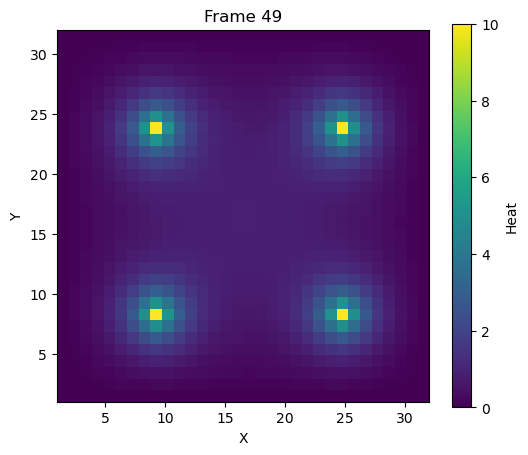

In [5]:
# Function to initialize the heat grid
def init_heat_grid(heat_grid, points):
    for p in points:
        heat_grid[p[0], p[1]] = p[2]
    return heat_grid

# Function to update the heat grid over time
def update_time_points(heat_grid, k, dt, points):
    heat_grid[1:-1, 1:-1] = heat_grid[1:-1, 1:-1] + (
        dt * k**2 * (heat_grid[:-2, 1:-1] + heat_grid[2:, 1:-1] - 4 * heat_grid[1:-1, 1:-1] +
                     heat_grid[1:-1, :-2] + heat_grid[1:-1, 2:]) / h**2)
    
    heat_grid = init_heat_grid(heat_grid, points)

# Function to animate frames
def animate_frame(frame, heat_grid, k, dt, points):
    update_time_points(heat_grid, k, dt, points)
    plt.clf()
    plt.imshow(heat_grid, extent=[1, 32, 1, 32], vmin=0, vmax=10)
    plt.colorbar(shrink=0.83, label='Heat')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Frame {frame}')

# main program
dt = 0.0001
N = 32
ext_sources = [[N // 4, N // 4, 10], [N // 4 + N // 2, N // 4 + N // 2, 10],
               [N // 4 + N // 2, N // 4, 10], [N // 4, N // 4 + N // 2, 10]]

heat_grid_ini = np.sin(np.pi * x_grid) * np.sin(np.pi * y_grid)
heat_grid_ini[0, :] = heat_grid_ini[N - 1, :] = 0
heat_grid_ini[:, 0] = heat_grid_ini[:, N - 1] = 0
heat_grid_ini = init_heat_grid(heat_grid_ini, ext_sources)
heat_grid = heat_grid_ini.copy()

# Setting up the animation
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
animation = FuncAnimation(fig, animate_frame, frames=50, repeat=False, fargs=(heat_grid, k, dt, ext_sources))

# Save the animation to a file (GIF format works better in some cases)
animation.save('heat_animation.gif', writer='pillow', fps=10)

# Display the animation as an HTML video
video_path = 'heat_animation.gif'
video_html = f'<img src="{video_path}" width="600" height="600" controls>'
display(HTML(video_html))
